<a href="https://colab.research.google.com/github/sundarjhu/Astrostatistics2025/blob/main/Lesson14_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Example of an $F$-test from Sec. 8.2 of Barlow
### Do physics and engineering students get the same grades on a test?
#### The answer is "Yes" if the mean of the grades for physics students is the same as that for the engineering students. This can be determined using a "standard" $t$-test.
#### But we first have to confirm that the two sets of grades **have the same population variance**, for which we perform an $F$-test.
---



In [27]:
import numpy as np
#Grades for physics students
data1 = np.array([39, 18, 3, 22, 24, 29, 22, 22, 27, 28, 23, 48])
data2 = np.array([42, 23, 36, 35, 38, 42, 33])

In [28]:
#Construct the observed F-statistic
var1 = data1.var(ddof = 1)
var2 = data2.var(ddof = 1)
#Define F such that F > 1
if var1 > var2:
  F = var1 / var2
  dof1 = len(data1) - 1
  dof2 = len(data2) - 1
else:
  F = var2 / var1
  dof1 = len(data2) - 1
  dof2 = len(data1) - 1

print(f"The observed value of the F statistic is {np.round(F, decimals=2)}")

The observed value of the F statistic is 2.83


In [29]:
#Perform the F-test
from scipy.stats import f
alpha = 0.05
#Calculate number of degrees of freedom for both data sets
dof1 = len(data1) - 1
dof2 = len(data2) - 1
pvalue = 1 - f.cdf(F, dof1, dof2)
if pvalue <= alpha:
  print("The p-value, {}, is lesser than the significance. The null hypothesis can be rejected!".format(np.format_float_scientific(pvalue, precision = 3)))
else:
  print("The p-value, {}, is greater than the significance. There is no evidence for any difference in the population variances!".format(np.format_float_scientific(pvalue, precision = 3)))

The p-value, 1.064e-01, is greater than the significance. There is no evidence for any difference in the population variances!


# Example of an $F$-test: testing for variability in light curves
## For an application in the literature, see [Goyal et al. 2012 A&A 544A 37](https://ui.adsabs.harvard.edu/abs/2012A%26A...544A..37G/abstract).

### The intrinsic variability is modelled as a sinusoidal wave, sampled on a non-uniform grid as is usually the case with observations.

In [30]:
#Simulate data
import numpy as np
period = 12.0 #in days, say
amp = 1.0 #peak-to-peak variability amplitude
n_obs = 22
#n_obs observations taken at randomly spaced times over 3.3 * period days
seed = 1001
np.random.seed(seed)
t = np.random.choice(np.linspace(0, 3.3 * period, 2 * n_obs), size = n_obs)
f_true = 5.0 + 0.5 * amp * np.sin(2 * np.pi * t / period)
ks = np.argsort(t); t = t[ks]; f_true = f_true[ks]

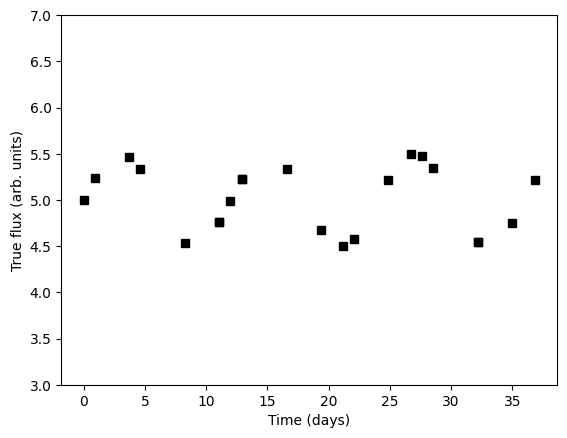

The peak-to-peak amplitude calculated from the data is  0.992


In [31]:
#visualise variability in simulated data
from matplotlib import pyplot as plt
plt.plot(t, f_true, 'ks')
plt.ylim(3, 7)
plt.xlabel('Time (days)'); plt.ylabel('True flux (arb. units)')
plt.show()
print('The peak-to-peak amplitude calculated from the data is ', np.round(f_true.max() - f_true.min(), decimals = 3))

### The measurement errors are assumed to be Gaussian centered at zero.

In [32]:
#Simulate measurement errors
from scipy.stats import norm, uniform
scale_factor = 0.25
np.random.seed(seed)
sigma_meas = np.abs(norm.rvs(loc = 0.0, scale = amp * scale_factor, size = n_obs))
f_meas = norm.rvs(loc = 0.0, scale = sigma_meas, size = n_obs)

### The variability in the observed flux is a combination of the intrinsic variability and that due to the measurement error.

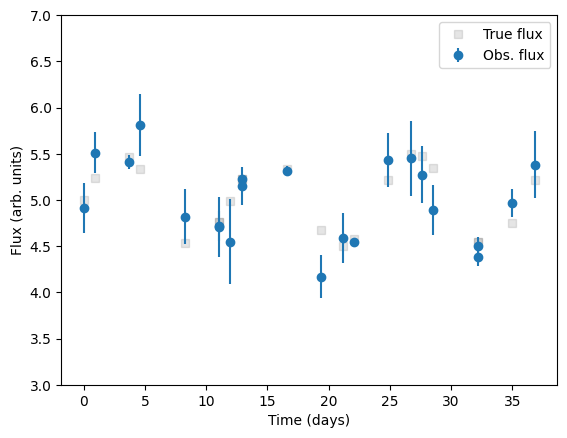

In [33]:
#Visualise observed data
f_obs = f_true + f_meas
plt.plot(t, f_true, 'ks', label = 'True flux', alpha = 0.1)
# plt.plot(t, f_obs, 'ro', label = 'Obs. flux')
# plt.errorbar(t, f_obs, yerr=np.abs(f_meas), fmt='o', label='Obs. flux')
plt.errorbar(t, f_obs, yerr=sigma_meas, fmt='o', label='Obs. flux')
plt.ylim(3, 7)
plt.xlabel('Time (days)'); plt.ylabel('Flux (arb. units)')
plt.legend(loc = 'best')
plt.show()
#difficult to decouple true variability from variance due to measurement uncertainty

### The $F$-test is performed to determine whether the data show significant evidence for variability.

In [34]:
#Construct F-statistic
F_obs = f_obs.var(ddof = 1) / f_meas.var(ddof = 1)
#Check that it is larger than 1; otherwise there's no point in trying to confirm variability
if F_obs > 1:
  print("The F-statistic is greater than 1!")
else:
  print("The F-statistic is less than 1, no point trying to detect variability")

The F-statistic is greater than 1!


In [35]:
#Can we reject the H0 = 'The observed variability is only due to the measurement uncertainties'?
from scipy.stats import f
alpha = 0.05
df1 = len(f_obs) - 1
df2 = len(f_meas) - 1
#p-value = P(F > observed value) = 1 - P(F <= observed value) = 1 - CDF(observed value)
pvalue = 1 - f.cdf(F_obs, df1, df2)
print(f"The p-value of the observed F-statistic is {np.round(pvalue, decimals=3)}")
if pvalue <= alpha:
  print("The p-value is less than the significance, the null hypothesis can be rejected!")
else:
  print("The p-value is greater than the significance, the null hypothesis cannot be rejected.")

The p-value of the observed F-statistic is 0.006
The p-value is less than the significance, the null hypothesis can be rejected!
